In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
import spacy.cli

spacy.cli.download("pt")

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
print(spacy.__version__)

3.3.0


In [ ]:
import numpy as np

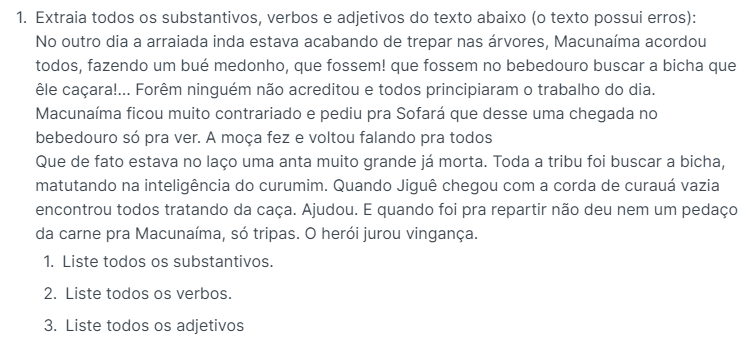

In [ ]:
nlp = spacy.load('pt_core_news_sm')

In [ ]:
doc = nlp('''No outro dia a arraiada inda estava acabando de trepar nas árvores, Macunaíma acordou todos, fazendo um bué medonho, que fossem! que fossem no bebedouro buscar a bicha que êle caçara!... Forêm ninguém não acreditou e todos principiaram o trabalho do dia.
Macunaíma ficou muito contrariado e pediu pra Sofará que desse uma chegada no bebedouro só pra ver. A moça fez e voltou falando pra todos
Que de fato estava no laço uma anta muito grande já morta. Toda a tribu foi buscar a bicha, matutando na inteligência do curumim. Quando Jiguê chegou com a corda de curauá vazia encontrou todos tratando da caça. Ajudou. E quando foi pra repartir não deu nem um pedaço da carne pra Macunaíma, só tripas. O herói jurou vingança.''')

In [ ]:
substantivos = []
verbos = []
adjetivos = []

for token in doc:
  if token.pos_ == 'VERB':
    verbos.append(token.text)
  
  elif token.pos_ == 'ADJ':
    adjetivos.append(token.text)
  
  elif token.pos_ == 'NOUN':
    substantivos.append(token.text)
    
print(f'substantivos: {substantivos}')
print(f'verbos: {verbos}')
print(f'adjetivos: {adjetivos}')

substantivos: ['dia', 'árvores', 'medonho', 'bebedouro', 'bicha', 'êle', 'trabalho', 'dia', 'chegada', 'bebedouro', 'moça', 'fato', 'laço', 'tribu', 'bicha', 'inteligência', 'curumim', 'corda', 'caça', 'pedaço', 'carne', 'tripas', 'herói', 'vingança']
verbos: ['arraiada', 'acabando', 'trepar', 'acordou', 'fazendo', 'buscar', 'caçara', 'acreditou', 'principiaram', 'ficou', 'pediu', 'ver', 'fez', 'voltou', 'falando', 'buscar', 'matutando', 'chegou', 'vazia', 'encontrou', 'tratando', 'Ajudou', 'repartir', 'deu', 'jurou']
adjetivos: ['bué', 'contrariado', 'anta', 'grande', 'morta']


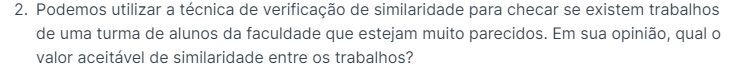

Essa é uma questão complicada já que trabalhos geralmente tratam dos mesmos temas e, dessa forma, possuiriam natualmente uma similiridade alta, porém é possivel utilizar. Valores acima de 80% provavelmente já tratariam de cópias.

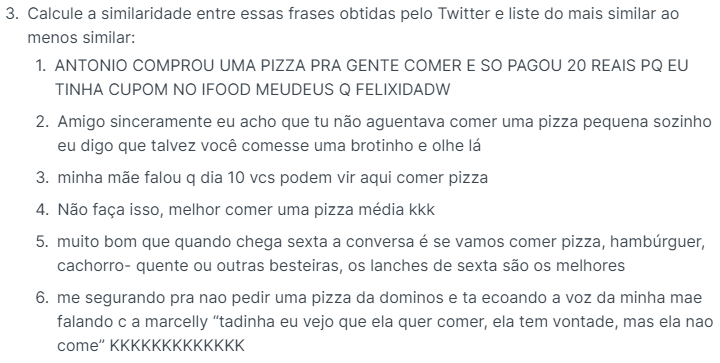

In [ ]:
ex3_twitter1 = nlp('ANTONIO COMPROU UMA PIZZA PRA GENTE COMER E SO PAGOU 20 REAIS PQ EU TINHA CUPOM NO IFOOD MEUDEUS Q FELIXIDADW')
ex3_twitter2 = nlp('Amigo sinceramente eu acho que tu não aguentava comer uma pizza pequena sozinho eu digo que talvez você comesse uma brotinho e olhe lá')
ex3_twitter3 = nlp('minha mãe falou q dia 10 vcs podem vir aqui comer pizza')
ex3_twitter4 = nlp('Não faça isso, melhor comer uma pizza média kkk')
ex3_twitter5 = nlp('muito bom que quando chega sexta a conversa é se vamos comer pizza, hambúrguer, cachorro- quente ou outras besteiras, os lanches de sexta são os melhores')
ex3_twitter6 = nlp('me segurando pra nao pedir uma pizza da dominos e ta ecoando a voz da minha mae falando c a marcelly “tadinha eu vejo que ela quer comer, ela tem vontade, mas ela nao come” KKKKKKKKKKKKK')

docs = [ex3_twitter1,ex3_twitter2,ex3_twitter3,ex3_twitter4,ex3_twitter5,ex3_twitter6]
similaridades = []
tweets = []

for i in range(1,len(docs)):
  print(f'Tweet {1} x Tweet {i+1}: {docs[0].similarity(docs[i])}')
  tweets.append(f'Tweet {1} x Tweet {i+1}')
  similaridades.append(docs[0].similarity(docs[i]))

docs.remove(ex3_twitter1)

for i in range(1,len(docs)):
  print(f'Tweet {2} x Tweet {i+2}: {docs[0].similarity(docs[i])}')
  tweets.append(f'Tweet {2} x Tweet {i+2}')
  similaridades.append(docs[0].similarity(docs[i]))

docs.remove(ex3_twitter2)

for i in range(1,len(docs)):
  print(f'Tweet {3} x Tweet {i+3}: {docs[0].similarity(docs[i])}')
  tweets.append(f'Tweet {3} x Tweet {i+3}')
  similaridades.append(docs[0].similarity(docs[i]))

docs.remove(ex3_twitter3)

for i in range(1,len(docs)):
  print(f'Tweet {4} x Tweet {i+4}: {docs[0].similarity(docs[i])}')
  tweets.append(f'Tweet {4} x Tweet {i+4}')
  similaridades.append(docs[0].similarity(docs[i]))

docs.remove(ex3_twitter4)

for i in range(1,len(docs)):
  print(f'Tweet {5} x Tweet {i+5}: {docs[0].similarity(docs[i])}')
  tweets.append(f'Tweet {5} x Tweet {i+5}')
  similaridades.append(docs[0].similarity(docs[i]))

print(f'\n\nOs tweets mais similares são: {tweets[np.argsort(similaridades)[::-1][0]]} com {similaridades[np.argsort(similaridades)[::-1][0]]}')

Tweet 1 x Tweet 2: 0.1354036746471211
Tweet 1 x Tweet 3: 0.3662249728684732
Tweet 1 x Tweet 4: 0.21004303718792106
Tweet 1 x Tweet 5: 0.21308469083629059
Tweet 1 x Tweet 6: 0.2808013830420305
Tweet 2 x Tweet 3: 0.5788865903674755
Tweet 2 x Tweet 4: 0.7266249449031955
Tweet 2 x Tweet 5: 0.6716076551140917
Tweet 2 x Tweet 6: 0.6442539658692057
Tweet 3 x Tweet 4: 0.6657758215235278
Tweet 3 x Tweet 5: 0.5330534435281244
Tweet 3 x Tweet 6: 0.6611531643543643
Tweet 4 x Tweet 5: 0.6838641947354337
Tweet 4 x Tweet 6: 0.6007448532907057
Tweet 5 x Tweet 6: 0.6203185907831107


Os tweets mais similares são: Tweet 2 x Tweet 4 com 0.7266249449031955


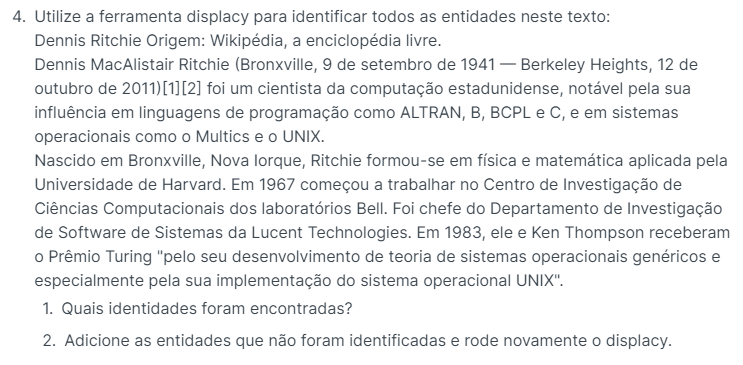

In [ ]:
texto = '''Dennis Ritchie, Origem: Wikipédia, a enciclopédia livre.
Dennis MacAlistair Ritchie (Bronxville, 9 de setembro de 1941 — Berkeley Heights, 12 de outubro de 2011)[1][2] foi um cientista da computação estadunidense, notável pela sua influência em linguagens de programação como ALTRAN, B, BCPL e C, e em sistemas operacionais como o Multics e o UNIX.
Nascido em Bronxville, Nova Iorque, Ritchie formou-se em física e matemática aplicada pela Universidade de Harvard. Em 1967 começou a trabalhar no Centro de Investigação de Ciências Computacionais dos laboratórios Bell. Foi chefe do Departamento de Investigação de Software de Sistemas da Lucent Technologies. Em 1983, ele e Ken Thompson receberam o Prêmio Turing "pelo seu desenvolvimento de teoria de sistemas operacionais genéricos e especialmente pela sua implementação do sistema operacional UNIX".'''
ex_4 = nlp(texto)

In [ ]:
from spacy import displacy
from spacy.tokens import Span

displacy.render(ex_4, style = "ent", jupyter = True)

In [ ]:
ents = [(e.text, e.label_, e.kb_id_) for e in ex_4.ents]
print(ents)

[('Dennis Ritchie', 'PER', ''), ('Origem: Wikipédia', 'MISC', ''), ('enciclopédia livre.', 'MISC', ''), ('Dennis MacAlistair Ritchie', 'PER', ''), ('Bronxville', 'LOC', ''), ('Berkeley Heights', 'ORG', ''), ('ALTRAN,', 'ORG', ''), ('B', 'MISC', ''), ('BCPL', 'MISC', ''), ('C', 'MISC', ''), ('Multics', 'MISC', ''), ('UNIX', 'MISC', ''), ('Bronxville', 'LOC', ''), ('Nova Iorque', 'LOC', ''), ('Ritchie', 'PER', ''), ('Universidade de Harvard', 'LOC', ''), ('Centro de Investigação de Ciências', 'LOC', ''), ('Bell', 'PER', ''), ('Departamento de Investigação de Software de Sistemas da Lucent Technologies', 'ORG', ''), ('Ken Thompson', 'PER', ''), ('Prêmio Turing', 'MISC', ''), ('UNIX', 'MISC', '')]


In [ ]:
# Teste de adição de entidades já que não há entidades não classificadas

for token in ex_4:
  if token.text == 'influência':
    print(token.i)
    ALTRAN_ent = Span(ex_4, token.i, token.i+1, label="ORG")
    orig_ents = list(ex_4.ents)
    ex_4.set_ents([ALTRAN_ent], default="unmodified")

43


In [ ]:
displacy.render(ex_4, style = "ent", jupyter = True)